In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv("./product_data.csv")

df.head(1)

,No.,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,Unnamed: 12
0,1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN


In [3]:
df.columns = ["No.", "Age", "Gender", "Category", "MarriageStatus", 
                "FactorsPurchase", "FreeCustomization", "ExteriorComponents", 
                "InteriorComponents", "WTSCustomization", "WantOwnPersonalization", 
                "WTSPersonalization", "PersonalizationJob"]

df.head(1)

,No.,Age,Gender,Category,MarriageStatus,FactorsPurchase,FreeCustomization,ExteriorComponents,InteriorComponents,WTSCustomization,WantOwnPersonalization,WTSPersonalization,PersonalizationJob
0,1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN


In [4]:
df.WTSCustomization.unique()

array(['500-1000', 'under 500', '0', 'over 1000'], dtype=object)

In [5]:
df_number = df.copy()

age_conversion = {"20-30": 25, "31-40": 35, "41-50": 45, "51-60": 55}
WTS_conversion = {"0": 0, "under 500": 500, "500-1000": 750, "over 1000": 1250}

df_number["Age"] = df_number["Age"].apply(lambda x: age_conversion[x])
df_number["WTSCustomization"] = df_number["WTSCustomization"].apply(lambda x: WTS_conversion[x])
df_number["WTSPersonalization"] = df_number["WTSPersonalization"].apply(lambda x: WTS_conversion[x])

df_number.head(1)


,No.,Age,Gender,Category,MarriageStatus,FactorsPurchase,FreeCustomization,ExteriorComponents,InteriorComponents,WTSCustomization,WantOwnPersonalization,WTSPersonalization,PersonalizationJob
0,1,25,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,750,No,750,NaN


In [6]:
df_number["isMale"] = df_number[["Gender"]] == "Male"

df_number.head(1)

,No.,Age,Gender,Category,MarriageStatus,FactorsPurchase,FreeCustomization,ExteriorComponents,InteriorComponents,WTSCustomization,WantOwnPersonalization,WTSPersonalization,PersonalizationJob,isMale
0,1,25,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,750,No,750,NaN,True


Text(0, 0.5, 'SSE')

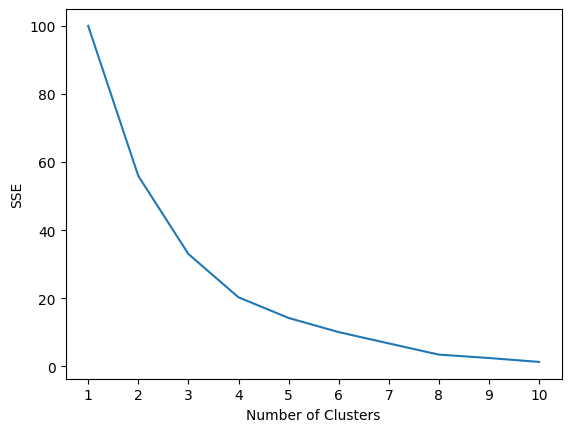

In [7]:
scaled = StandardScaler().fit_transform(df_number[["WTSCustomization", "WTSPersonalization"]].dropna())

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans =  KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
# plt.show()

In [8]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled)

#view cluster assignments for each observation
label = kmeans.labels_

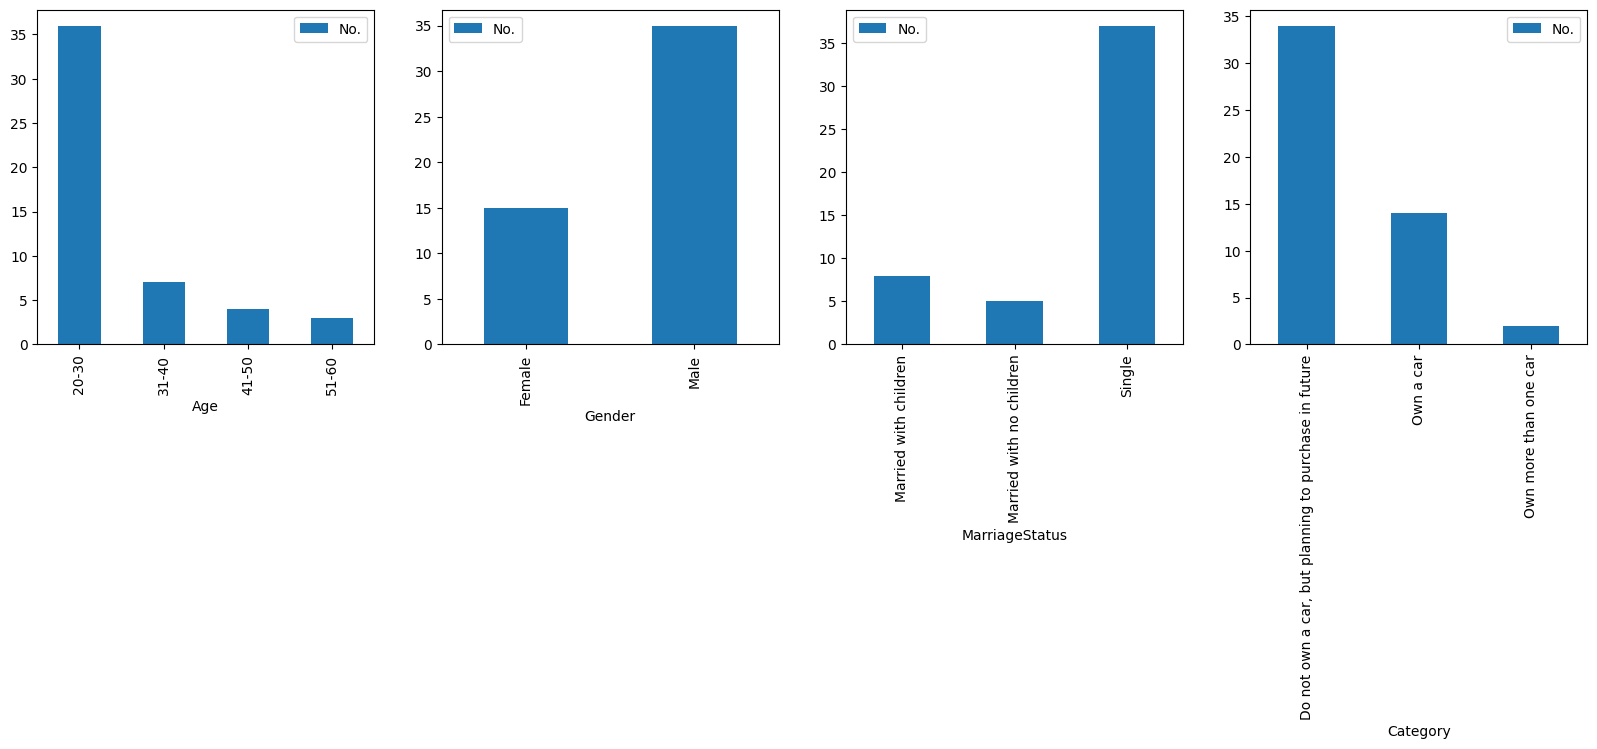

In [9]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
df.groupby("Age").count()[["No."]].plot(kind='bar', ax=ax)
ax = plt.subplot(442)
df.groupby("Gender").count()[["No."]].plot(kind='bar', ax=ax)
ax = plt.subplot(443)
df.groupby("MarriageStatus").count()[["No."]].plot(kind='bar', ax=ax)
ax = plt.subplot(444)
df.groupby("Category").count()[["No."]].plot(kind='bar', ax=ax)

plt.show()

In [10]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
pd.crosstab(df['Age'], df['FreeCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(442)
pd.crosstab(df['Gender'], df['FreeCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(443)
pd.crosstab(df['MarriageStatus'], df['FreeCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(444)
pd.crosstab(df['Category'], df['FreeCustomization']).plot(kind='bar', ax=ax)

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
pd.crosstab(df['Age'], df['WantOwnPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(442)
pd.crosstab(df['Gender'], df['WantOwnPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(443)
pd.crosstab(df['MarriageStatus'], df['WantOwnPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(444)
pd.crosstab(df['Category'], df['WantOwnPersonalization']).plot(kind='bar', ax=ax)

plt.show()


In [ ]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
pd.crosstab(df['Age'], df['WTSCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(442)
pd.crosstab(df['Gender'], df['WTSCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(443)
pd.crosstab(df['MarriageStatus'], df['WTSCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(444)
pd.crosstab(df['Category'], df['WTSCustomization']).plot(kind='bar', ax=ax)

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
pd.crosstab(df['Age'], df['WTSPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(442)
pd.crosstab(df['Gender'], df['WTSPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(443)
pd.crosstab(df['MarriageStatus'], df['WTSPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(444)
pd.crosstab(df['Category'], df['WTSPersonalization']).plot(kind='bar', ax=ax)

plt.show()

### Association Rules

In [ ]:
df_factor = df.assign(ind=df["FactorsPurchase"].str.split(";"), dummy=1) \
    .explode('ind').pivot_table('dummy', 'No.', 'ind', fill_value=0).add_prefix('Feat_')

df_factor.columns = ["Factor_Aesthetics", "Factor_BrandName", "Factor_CustomizableOptions", 
                        "Factor_Functionality", "Factor_Price", "Factor_Size",
                        "Factor_Sustainability", "Factor_Technological"]

freq_items1 = apriori(df_factor, min_support = 0.5, use_colnames=True)
rules1 = association_rules(freq_items1, metric = "lift", min_threshold = 1)

rules1

In [ ]:
df_ext = df.assign(ind=df["ExteriorComponents"].str.split(";"), dummy=1) \
    .explode('ind').pivot_table('dummy', 'No.', 'ind', fill_value=0).add_prefix('Ext_')

df_ext.columns = ["Ext_Bumpers", "Ext_Grilles", "Ext_Headlights", 
                    "Ext_SideMirrors", "Ext_Wheels", "Ext_BodyKit"]

freq_items2 = apriori(df_ext, min_support = 0.5, use_colnames=True)
rules2 = association_rules(freq_items2, metric = "lift", min_threshold = 1)

rules2

In [ ]:
df_int = df.assign(ind=df["InteriorComponents"].str.split(";"), dummy=1) \
    .explode('ind').pivot_table('dummy', 'No.', 'ind', fill_value=0).add_prefix('Int_')

df_int.columns = ["Int_CenterCompartment", "Int_Dashboard", "Int_DoorHandles", 
                    "Int_MusicPlayer", "Int_SteeringWheel", "Int_SunBlocker", 
                    "Int_AirVent"]

freq_items3 = apriori(df_int, min_support = 0.5, use_colnames=True)
rules3 = association_rules(freq_items3, metric = "lift", min_threshold = 1)

rules3

In [ ]:
df.columns = ["No.", "Age", "Gender", "Category", "MarriageStatus", 
                "FactorsPurchase", "FreeCustomization", "ExteriorComponents", 
                "InteriorComponents", "WTSCustomization", "WantOwnPersonalization", 
                "WTSPersonalization", "PersonalizationJob"]

df.head(1)

In [ ]:
df_test = df[["No.", "Age", "Gender", "MarriageStatus", "FreeCustomization", "WantOwnPersonalization", "PersonalizationJob"]]

df_test["Married"] = df_test["MarriageStatus"] != "Single"
df_test["Male"] = df_test["Gender"] == "Male"
df_test["Younger40"] = np.logical_or(df_test["Age"] == "20-30", df_test["Age"] == "31-40")
df_test["FreeCustomization"] = df_test["FreeCustomization"] != "Unlikely"
df_test["WantOwnPersonalization"] = df_test["WantOwnPersonalization"] != "No"
df_test["PersonalizationJob"] = df_test["PersonalizationJob"] == "Yes, I can design on my own"

del df_test["No."]
del df_test["Age"]
del df_test["Gender"]
del df_test["MarriageStatus"]

In [ ]:
freq_items4 = apriori(df_test, min_support = 0.7, use_colnames=True)
rules4 = association_rules(freq_items4, metric = "lift", min_threshold = 1)

rules4